In [1]:
import pandas as pd
import numpy as np
import glob
import re
import re
import os

In [2]:
tablepath='datos/medidas.xlsx'


In [3]:
lambdadisco= {'Halfa-7 nm':656.281,
              'Halfa-35 nm':656.281,
              'Hbeta-8.5nm':486.135}
dlambdadisco={'Halfa-7 nm':7,
              'Halfa-35 nm':35,
              'Hbeta-8.5nm':8.5}
alphap_mas  ={'Sirio':6.04,
              'Rigel':2.77,
              'Betelgeuse':54.04,
              'GammaLeo':7.70,
              'Arturo':21}
filtername= {'Halfa-7 nm':'H-alpha (7 nm)',
              'Halfa-35 nm':'H-alpha (35 nm)',
              'Hbeta-8.5nm':'H-beta (8.5 nm)'}
starname={'Sirio':'Sirius',
          'Rigel':'Rigel',
          'Betelgeuse':'Betelgeuse',
          'GammaLeo':'GammaLeo',
          'Arturo':'Arcturus'}

alphap={k:ap*(np.pi/180/1000/3600) for k, ap in alphap_mas.items()} #rad

In [4]:
dts={}#{'D (mm)':np.int16,'L (mm)':np.int16,'L1 (mm)':np.int16,'L2 (mm)':np.int16}
cols=['D (mm)','L (mm)','L1 (mm)','L2 (mm)']
df=pd.read_excel(tablepath,engine="openpyxl",index_col=0,converters=dts                 
                )
df

,Objeto,Filtro,Disco,D (mm),L (mm),L1 (mm),L2 (mm),Notas
Imagen,,,,,,,,
1,Arturo,Halfa-7 nm,D,30,310.0,NaN,NaN,a Borde no encaja
2,Arturo,Halfa-7 nm,D,30,230.0,NaN,NaN,a
3,Arturo,Halfa-7 nm,D,30,150.0,NaN,NaN,a
4,Arturo,Halfa-7 nm,D,30,270.0,NaN,NaN,b
5,Arturo,Halfa-7 nm,D,30,190.0,NaN,NaN,b
6,Arturo,Halfa-7 nm,D,30,60.0,NaN,NaN,fuera de eje
7,Arturo,Halfa-7 nm,D,30,40.0,NaN,NaN,contiguos b
8,Arturo,Halfa-7 nm,D,30,190.0,NaN,NaN,no simetrico
9,Arturo,Halfa-7 nm,D,30,NaN,NaN,NaN,4X


In [5]:
for c in cols:
    df[c]=pd.to_numeric(df[c],errors='coerce')
df['Filtro']=df['Filtro'].str.strip()
df['Objeto']=df['Objeto'].str.strip()
df['Disco']=df['Disco'].str.strip()

In [6]:
names=[]
ims=[]
for name in glob.glob('datos/videos/*/*.avi'):
    names.append(name)
    ims.append(int(re.search('\d+', name.split('\\')[-1])[0]))

paths=pd.DataFrame({'PATH':names,'Imagen':ims},index=ims)
paths

,PATH,Imagen
1,datos/videos\Arturo\1-2022-07-02-004043-M104-B...,1
2,datos/videos\Arturo\2-2022-07-02-004341-M104-B...,2
3,datos/videos\Arturo\3-2022-07-02-004744-M104-B...,3
4,datos/videos\Arturo\4-2022-07-02-005921-M104-B...,4
5,datos/videos\Arturo\5-2022-07-02-010411-M104-B...,5
6,datos/videos\Arturo\6-2022-07-02-010800-M104-B...,6
7,datos/videos\Arturo\7-2022-07-02-011025-M104-B...,7
8,datos/videos\Arturo\8-2022-07-02-011616-M104-B...,8
9,datos/videos\Arturo\9-2022-07-02-011947-M104-B...,9


In [7]:
df=df.join(paths)
df

,Objeto,Filtro,Disco,D (mm),L (mm),L1 (mm),L2 (mm),Notas,PATH,Imagen
Imagen,,,,,,,,,,
1,Arturo,Halfa-7 nm,D,30,310.0,NaN,NaN,a Borde no encaja,datos/videos\Arturo\1-2022-07-02-004043-M104-B...,1
2,Arturo,Halfa-7 nm,D,30,230.0,NaN,NaN,a,datos/videos\Arturo\2-2022-07-02-004341-M104-B...,2
3,Arturo,Halfa-7 nm,D,30,150.0,NaN,NaN,a,datos/videos\Arturo\3-2022-07-02-004744-M104-B...,3
4,Arturo,Halfa-7 nm,D,30,270.0,NaN,NaN,b,datos/videos\Arturo\4-2022-07-02-005921-M104-B...,4
5,Arturo,Halfa-7 nm,D,30,190.0,NaN,NaN,b,datos/videos\Arturo\5-2022-07-02-010411-M104-B...,5
6,Arturo,Halfa-7 nm,D,30,60.0,NaN,NaN,fuera de eje,datos/videos\Arturo\6-2022-07-02-010800-M104-B...,6
7,Arturo,Halfa-7 nm,D,30,40.0,NaN,NaN,contiguos b,datos/videos\Arturo\7-2022-07-02-011025-M104-B...,7
8,Arturo,Halfa-7 nm,D,30,190.0,NaN,NaN,no simetrico,datos/videos\Arturo\8-2022-07-02-011616-M104-B...,8
9,Arturo,Halfa-7 nm,D,30,NaN,NaN,NaN,4X,datos/videos\Arturo\9-2022-07-02-011947-M104-B...,9


In [8]:
df['$\lambda$']=df['Filtro'].map(lambdadisco)
df['$d\lambda$']=df['Filtro'].map(dlambdadisco)
df['alphap']=df['Objeto'].map(alphap)
df['alphap_mas']=df['alphap'].apply(lambda x: x/ (np.pi/180/1000/3600))
df['filtername']=df['Filtro'].map(filtername)
df['starname']=df['Objeto'].map(starname)

In [9]:
df['DATE']=df['PATH'].apply(lambda x: re.findall("\d{2}-\d{2}-\d{2}", x.split('\\')[-1])[0])
df['DAY']=df['DATE'].apply(lambda x:int(x.split('-')[-1]))

In [10]:
def format_hour(txt):
    return txt[:2]+':'+txt[2:4]+':'+txt[4:6]

df['HOUR']=df['PATH'].apply(lambda x: format_hour(x.split('\\')[-1].split('-')[4]))


In [11]:

df['csv_path']=df.apply(lambda x: f"datos\\imagenes\\{x['Objeto']}\\video-{x['Imagen']}\\video-{x['Imagen']}.xlsx" ,axis=1)


In [12]:
def get_s(csv_path,column_name):
    try:
        dfdata=pd.read_excel(csv_path[column_name],index_col="Fotograma")
    except FileNotFoundError:
        return -1,-1,-1
    # print(csv_path)
    # print("V= ",dfdata['V'].mean())
    # print("desv=",dfdata['V'].std())
    V=dfdata['V'].mean()
    S=dfdata['V'].std()
    n=len(dfdata)
    S_tip=S/(n**.5)
    return V, S, S_tip

df[['V_media','S','S_tip']]=df.apply(get_s,axis=1,result_type="expand",column_name="csv_path")
df[['V_media','S','S_tip']]


,V_media,S,S_tip
Imagen,,,
1,0.057449,0.029049,0.009186
2,0.098542,0.025492,0.008061
3,0.080260,0.037753,0.011938
4,0.070075,0.032532,0.010287
5,0.118105,0.036563,0.011562
6,0.344167,0.065485,0.020708
7,0.582516,0.076429,0.024169
8,0.089529,0.047105,0.014896
9,-1.000000,-1.000000,-1.000000


In [13]:
df['E_acc']=df["S_tip"]*2.2622

In [14]:
df[['V_media','E_acc']]

,V_media,E_acc
Imagen,,
1,0.057449,0.020781
2,0.098542,0.018236
3,0.080260,0.027007
4,0.070075,0.023272
5,0.118105,0.026156
6,0.344167,0.046846
7,0.582516,0.054675
8,0.089529,0.033697
9,-1.000000,-2.262200


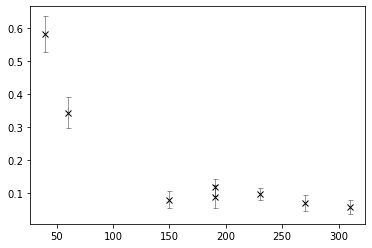

In [24]:
import matplotlib.pyplot as plt

df_sel=df[df["V_media"]>0]
# df_sel.plot(x="L (mm)",y="V_media",kind="scatter")
B_exp=df_sel['L (mm)']
V_exp=df_sel['V_media']
V_err=df_sel['E_acc']
plt.errorbar(B_exp, V_exp, yerr=V_err,label="Experimental error nuevo",marker='x',color='black',linestyle='None',
ecolor=(0, 0, 0, 0.4),elinewidth=1,capsize=2.5)
plt.show()

In [16]:
df[['Imagen','Objeto','DATE','DAY','HOUR','V_media','E_acc']]

,Imagen,Objeto,DATE,DAY,HOUR,V_media,E_acc
Imagen,,,,,,,
1,1,Arturo,22-07-02,2,00:40:43,0.057449,0.020781
2,2,Arturo,22-07-02,2,00:43:41,0.098542,0.018236
3,3,Arturo,22-07-02,2,00:47:44,0.080260,0.027007
4,4,Arturo,22-07-02,2,00:59:21,0.070075,0.023272
5,5,Arturo,22-07-02,2,01:04:11,0.118105,0.026156
6,6,Arturo,22-07-02,2,01:08:00,0.344167,0.046846
7,7,Arturo,22-07-02,2,01:10:25,0.582516,0.054675
8,8,Arturo,22-07-02,2,01:16:16,0.089529,0.033697
9,9,Arturo,22-07-02,2,01:19:47,-1.000000,-2.262200


In [17]:
df.to_hdf('intermedio/tabla_arturo.h5',key='df', mode='w')